Name: Ankita Patel

Date:- 29th November 2022

Topic:- **Data Science on Employee Attrition Dataset**

Developing a pipeline in Python with the steps: a) data cleaning and formatting, b) data selection, c) data manipulation, d) visualization, and e) analysis.

In [ ]:
pip install pdpipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# insert code here
#connecting to google drive to import data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import pdpipe as pdp
import  seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, accuracy_score,)
from sklearn.model_selection import (cross_val_predict, cross_val_score, train_test_split,GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


In [ ]:
#importing data
D1 = pd.read_csv("/content/drive/MyDrive/HR-Employee-Attrition.csv",)
pd.set_option('display.max.columns', None)

#Data cleaning and Formatting

In [ ]:
def data_cleaning(dataframe):
  print('\nData Cleaning and Formatting\n')
  #checking the data attributes
  print('\n',dataframe.info())
  #checking for null values
  print('\nThe null values in the dataset:\n', dataframe.isnull().sum())
  #data description
  print('\nThe descriptive form of dataset:\n', dataframe.describe())
  #chehcking for duplicate values
  print('\nThe number of duplicate values in dataset:', dataframe.duplicated().sum())
  #chehcking for missing data
  print('\nChecking for missing data:\n', dataframe.isna().sum())

#Data Selection

In [ ]:
def data_selection(dataframe):
  #dropping the unwanted column
  dataframe.drop(columns=['EmployeeNumber'],inplace = True)
  print('\nThe column has been dropped\n')

#Data Manipulation

In [ ]:
def data_manipulation(dataframe):
  #distributing the object columns and integer columns
    numerical_attrs = D1.select_dtypes(include=np.number).columns.to_list()
    categorical_attrs = D1.select_dtypes(include='object').columns.to_list()
    assert all([col in numerical_attrs + categorical_attrs for col in D1.columns])
    print('The numerical attributes are:\n', numerical_attrs)
    print('\nThe categorical attributes are:\n', categorical_attrs)

#Data Visualization

In [ ]:
def data_visulaization(dataframe):

  matrix = D1.corr().round(2)
  print('Data Visulaization\n')
  f, ax = plt.subplots(figsize=(10, 8))
  ax = sns.heatmap(matrix, vmin=-1, vmax=1, cmap ="Blues_r")
  ax.set_title('Corelation map between the numeric features')
  statistics = D1.select_dtypes(include=np.number).columns.to_list()
  objects = D1.select_dtypes(include='object').columns.to_list()
  assert all([col in statistics + objects for col in D1.columns])
  train_df, test_df = train_test_split(D1, test_size=0.2, random_state=314, stratify=D1.Attrition)

  #plotting for the statistics with their attrition probabilities
  train_df[statistics].hist(color='green', figsize=(16, 12))
  sns.despine(left=True)
  plt.tight_layout()

  #plotting for objects with their attrition probabilities
  nrows = ncols = 3
  fig, ax0 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))

  for i, col in enumerate(objects):
      row_idx = int(i / nrows)
      col_idx = int(i % ncols)
      sns.countplot(data=train_df, x=col, color='blue', ax=ax0[row_idx, col_idx])

  total = len(train_df)
  for rows in ax0:
      for ax in rows:
          ax.set_yticklabels([])
          ax.set_ylabel('')
          for p in ax.patches:
              percentage = f'{100 * p.get_height() / total:.1f}%\n'
              x = p.get_x() + p.get_width() / 2
              y = p.get_height()
              ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=7)

  ax0[0, 1].tick_params(axis='x', rotation=90)
  ax0[0, 2].tick_params(axis='x', rotation=90)
  ax0[1, 0].tick_params(axis='x', rotation=90)
  ax0[1, 2].tick_params(axis='x', rotation=90)

  sns.despine(left=True, )
  plt.tight_layout()


#Data Analysis



In [ ]:
def data_analysis(dataframe):
  # training dataset
    #distributing the object columns and integer columns
    statistics = D1.select_dtypes(include=np.number).columns.to_list()
    objects = D1.select_dtypes(include='object').columns.to_list()
    assert all([col in statistics + objects for col in D1.columns])

    print('Logistic Regression model\n')
    train_df, test_df = train_test_split(D1, test_size=0.2, random_state=314, stratify=D1.Attrition)
    print('Shapes of training and testing dataset:', train_df.shape, test_df.shape)

    X_train = train_df.drop(columns='Attrition')
    y_train = train_df['Attrition'].copy()

    removed_attrs = set(['Over18', 'Gender', 'EmployeeCount', 'PerformanceRating', 'StandardHours', 'Attrition'])

    objects = list(set(objects) - removed_attrs)
    statistics = list(set(statistics) - removed_attrs)

    assert len(objects) == 6
    assert len(statistics) == 22

    X_train = X_train[objects+statistics].copy()
    X_train.shape

    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)

    assert y_train.sum() == train_df[train_df.Attrition=='Yes'].shape[0]

    transformation_pipeline = ColumnTransformer([('num', StandardScaler(), statistics),('cat', OneHotEncoder(), objects),], remainder='drop')
    X_train = transformation_pipeline.fit_transform(X_train)

    feature_names = np.array([])
    for transf in transformation_pipeline.transformers_:
        feature_names = np.append(feature_names, transf[1].get_feature_names_out())

    log_reg = LogisticRegression().fit(X_train, y_train)
    y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=10)
    print('Training Data Analysis\n')
    print('Confusion matrix\n', confusion_matrix(y_train, y_train_pred))
    print('Accuracy:', accuracy_score(y_train, y_train_pred))
    print('Precision:', precision_score(y_train, y_train_pred))
    print('Recall:', recall_score(y_train, y_train_pred))
    print('F1-score:', f1_score(y_train, y_train_pred))


    # Visualise the decision function
    def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
      plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
      plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
      plt.legend(loc="center right", fontsize=16)
      plt.xlabel("Threshold", fontsize=16)
      plt.grid(True)
      plt.axis([-10, 10, 0, 1])

    y_train_scores = cross_val_predict(log_reg, X_train, y_train, cv=10, method='decision_function')
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)


    plt.figure(figsize=(8, 4))
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()

  # testing dataset
    final_model = log_reg

    X_test = test_df.drop(columns='Attrition')
    y_test = test_df['Attrition'].copy()

    X_test = transformation_pipeline.transform(X_test)
    y_test = encoder.transform(y_test)

    y_test_pred = final_model.predict(X_test)
    print('Testing Data Analysis\n')
    print('Confusion matrix\n', confusion_matrix(y_test, y_test_pred))
    print('Accuracy:', accuracy_score(y_test, y_test_pred))
    print('Precision:', precision_score(y_test, y_test_pred))
    print('Recall:', recall_score(y_test, y_test_pred))
    print('F1-score:', f1_score(y_test, y_test_pred))

    mean_attritions = lambda x: (x == 'Yes').mean()
    attrition_by_dpt = train_df.groupby(by='Department').agg({'Attrition': mean_attritions}).sort_values(by='Attrition', ascending=False)
    attrition_by_edu = train_df.groupby(by='EducationField').agg({'Attrition': mean_attritions}).sort_values(by='Attrition', ascending=False)
    attrition_by_job = train_df.groupby(by='JobRole').agg({'Attrition': mean_attritions}).sort_values(by='Attrition', ascending=False)

    def plot_table(df, title='', ax=None):
          ax = df.sort_values(by='Attrition', ascending=True).plot(kind='barh', color='blue', ax=ax, title=title)
          ax.get_legend().remove()
          ax.grid()
          ax.set_ylabel('')
          sns.despine(left=True, bottom=True)
          plt.tight_layout()


    fig = plt.figure(figsize=(10, 8))
    spec = fig.add_gridspec(ncols=1, nrows=3)

    ax0 = fig.add_subplot(spec[0, 0])
    ax1 = fig.add_subplot(spec[1, 0])
    ax2 = fig.add_subplot(spec[2, 0])

    plot_table(attrition_by_job, title='Mean attrition by Job Role', ax=ax0)
    plot_table(attrition_by_dpt, title='Mean attrition by Department', ax=ax1)
    plot_table(attrition_by_edu, title='Mean attrition by Education', ax=ax2)

    sorted(zip(log_reg.coef_[0], feature_names), reverse=True)
    ax = pd.DataFrame({'coef': log_reg.coef_[0]}, index=feature_names).sort_values(by='coef').iloc[-15:].plot(kind='bar', color='green', figsize=(4, 3),  title='Impactful work attributes\n(Logistic regression coefficient)')
    ax.get_legend().remove()

    sns.despine(left=True, bottom=True)
    plt.tight_layout()


#Data Pipeline

In [ ]:
def datapipeline(dataframe):
  data_cleaning(dataframe)
  data_selection(dataframe)
  data_manipulation(dataframe)
  data_visulaization(dataframe)
  data_analysis(dataframe)




Data Cleaning and Formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64

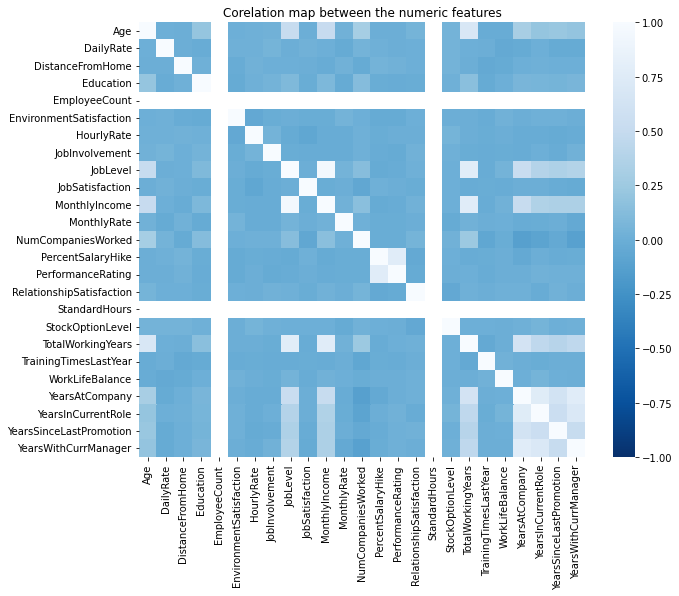

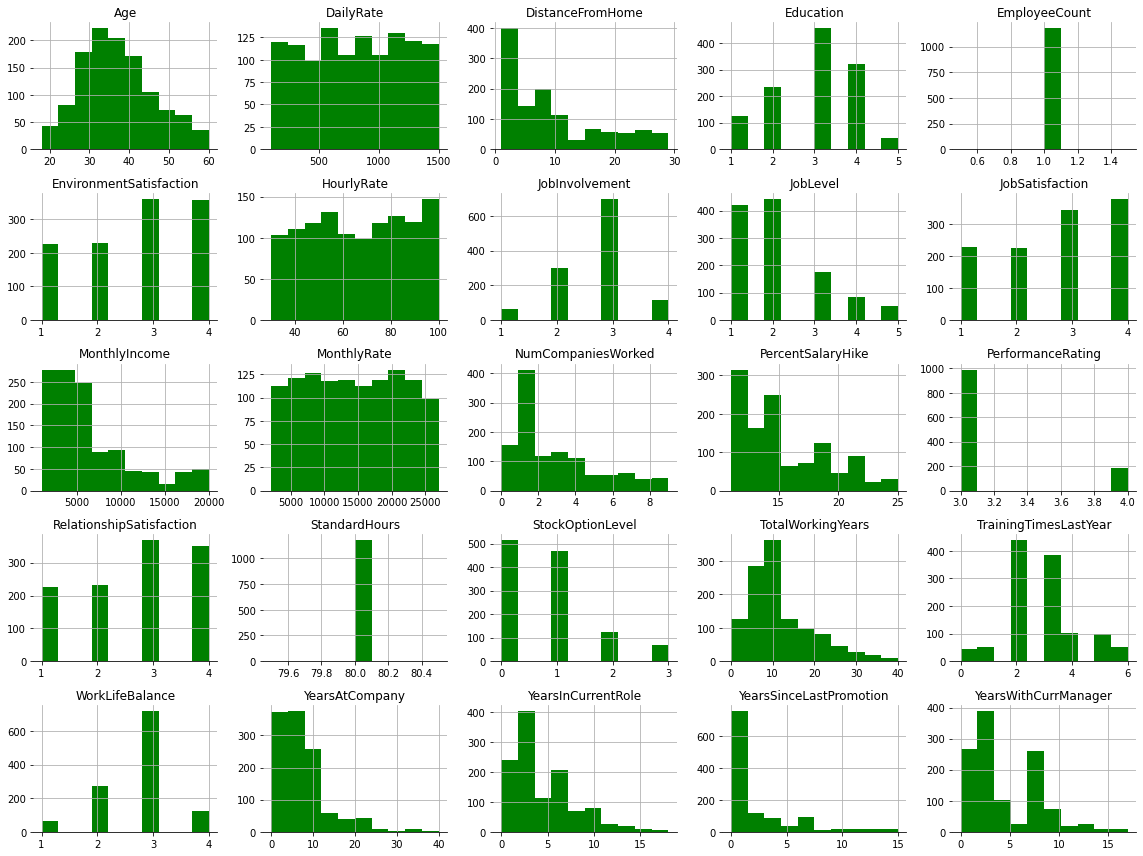

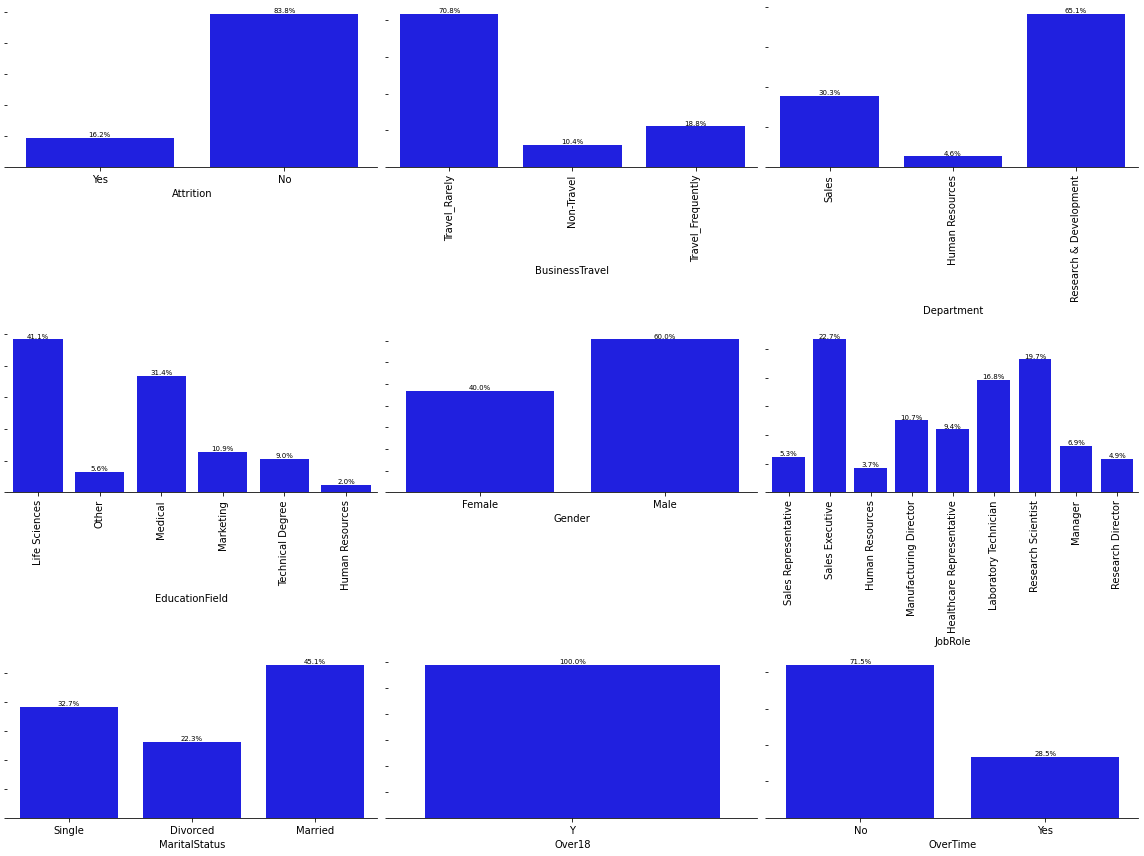

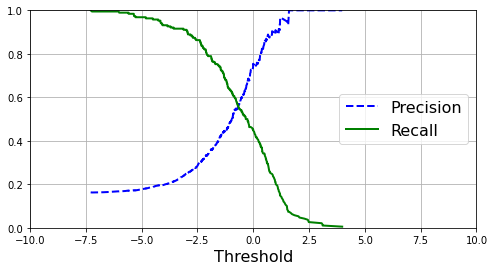

Testing Data Analysis

Confusion matrix
 [[239   8]
 [ 27  20]]
Accuracy: 0.8809523809523809
Precision: 0.7142857142857143
Recall: 0.425531914893617
F1-score: 0.5333333333333333


<ipython-input-84-22daae4fe4e4>:112: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


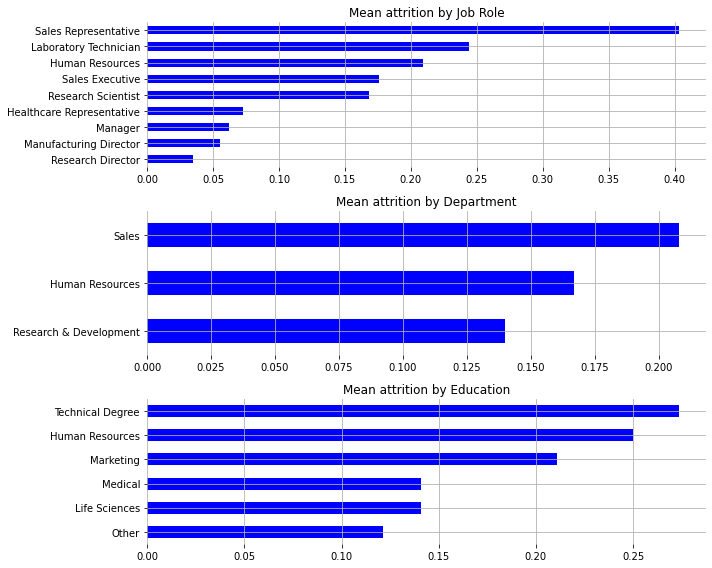

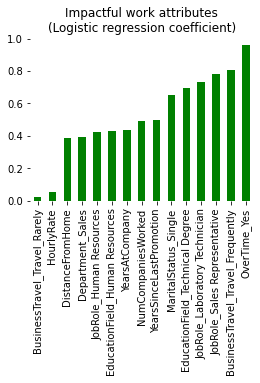

In [ ]:
# Creating a pipeline that applies all the functions created above
pipeline = D1.pipe(datapipeline)
# calling pipeline
pipeline

How accurate is our model to in terms of Attrition

**From the above execution we can interpret that the model is 88% accurate in terms of both testing and training dataset.**


What are the most frequent departments, fields, and job roles that experience attrition?

**From the above determined mean values of the data we can see that Sales and Technical are the one's that experience most of the attrition.**

What are the top most impactful work attributes that increase the chances of attrition?

**From the above logistic regression coefficient we can see the the impactfull work attributes that increase the chances of Attrition. They are:**

**1.   Working over time**

**2.   Travelling frequently for business**

**3.   Sales and Technical job roles**

